# Laboratory 1 - Data Exploration
#### 25th June 2022

## Linear regression

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import sklearn as skl
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import sklearn.utils, sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# importing dataset and visulising the first five rows
dataset = pd.read_excel(r'file:/Users/AlessandroVavala/Desktop/Alessandro/Università/WSB Pol/Data exploration method/salary_data.xlsx')
X = dataset.iloc[:, :-1].values # creating an array with values from YearsExperience
y = dataset.iloc[:, 1].values # creating an array with values from Salary, the dependent variable
print("Dataset values")
dataset.head()

Dataset values


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
print(dataset.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

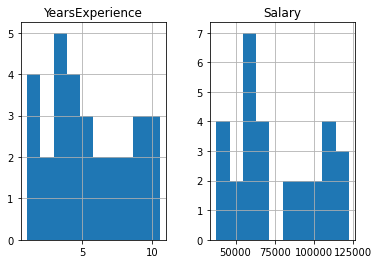

In [4]:
dataset.hist()

In [5]:
# splitting the dataset into training set and test set. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 2/3, random_state= 120)

# printing out the training sets and test sets, the size along with various statistics
print()
print("X_train Dataset Description and values:")
print(stats.describe(X_train))
print("X_test Array Size: " + str(X_train.size))
#print(X_train)
print()
print("X_test Dataset Description and values:")
print(stats.describe(X_test))
print("X_test Array Size: " + str(X_test.size))
#print(X_test)
print()
print("y_train Dataset Description and values:")
print(stats.describe(y_train))
#print(y_train)
print()
print("y_test Dataset Description and values:")
print(stats.describe(y_test))
#print(y_test)
print()
print("X_Train and y_train shape definition:")
print(X_train.shape)
print(y_train.shape)


X_train Dataset Description and values:
DescribeResult(nobs=10, minmax=(array([1.1]), array([8.7])), mean=array([4.52]), variance=array([5.564]), skewness=array([0.11236426]), kurtosis=array([-0.66684495]))
X_test Array Size: 10

X_test Dataset Description and values:
DescribeResult(nobs=20, minmax=(array([1.5]), array([10.5])), mean=array([5.71]), variance=array([9.15989474]), skewness=array([0.26885926]), kurtosis=array([-1.3933746]))
X_test Array Size: 20

y_train Dataset Description and values:
DescribeResult(nobs=10, minmax=(39343.0, 109431.0), mean=70630.3, variance=526241098.23333335, skewness=0.291008839241123, kurtosis=-1.1253288184481411)

y_test Dataset Description and values:
DescribeResult(nobs=20, minmax=(37731.0, 122391.0), mean=78689.35, variance=875043125.7131579, skewness=0.23155521474206187, kurtosis=-1.4888346983672696)

X_Train and y_train shape definition:
(10, 1)
(10,)


In [6]:
# Feature Scaling

'''sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)'''


scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train.reshape(-1, 1))
X_test_sc = scaler.fit_transform(X_test.reshape(-1, 1))
y_train_sc = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_sc = scaler.fit_transform(y_test.reshape(-1, 1))

In [7]:
# printing out the scaled sets along with statistics
print("X_train scaled Dataset Description and values:")
print(stats.describe(X_train_sc))
print(X_train_sc)
print()
print("X_test scaled Dataset Description and values:")
print(stats.describe(X_test_sc))
print("X_test Array Size: " + str(X_test.size))
print(X_test_sc)
print()
print("y_train Dataset scaled Description and values:")
print(stats.describe(y_train_sc))
print(y_train_sc)
print()
print("y_test Dataset scaled Description and values:")
print(stats.describe(y_test_sc))
print(y_test_sc)
print()
print("X_Train scaled and y_train scaled shape definition:")
print(X_train_sc.shape)
print(y_train_sc.shape)

X_train scaled Dataset Description and values:
DescribeResult(nobs=10, minmax=(array([-1.52830942]), array([1.86793374])), mean=array([-6.88338275e-16]), variance=array([1.11111111]), skewness=array([0.11236426]), kurtosis=array([-0.66684495]))
[[ 0.66137367]
 [-1.4389346 ]
 [-0.23237453]
 [ 0.3485618 ]
 [ 1.01887295]
 [ 1.86793374]
 [ 0.16981216]
 [-0.27706194]
 [-1.52830942]
 [-0.58987381]]

X_test scaled Dataset Description and values:
DescribeResult(nobs=20, minmax=(array([-1.42716784]), array([1.62378479])), mean=array([-1.11022302e-17]), variance=array([1.05263158]), skewness=array([0.26885926]), kurtosis=array([-1.3933746]))
X_test Array Size: 20
[[-0.579681  ]
 [-1.25767047]
 [ 1.55598584]
 [ 1.31868953]
 [-0.20678679]
 [-1.42716784]
 [-0.85087679]
 [ 1.28479005]
 [-0.95257521]
 [-1.18987153]
 [ 0.74239847]
 [ 0.47120268]
 [ 0.8440969 ]
 [-0.54578153]
 [ 1.62378479]
 [-0.41018363]
 [-0.91867574]
 [ 0.064409  ]
 [ 1.11529269]
 [-0.68137942]]

y_train Dataset scaled Description a

In [8]:
# importing Linear Regression from scikit-learn
from sklearn.linear_model import LinearRegression

# Creating the regressor. passing the training sets into the regressor to train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train )

LinearRegression()

In [9]:
# checking what are 
regressor.__dir__()

['fit_intercept',
 'normalize',
 'copy_X',
 'n_jobs',
 'positive',
 'n_features_in_',
 'coef_',
 '_residues',
 'rank_',
 'singular_',
 'intercept_',
 '__module__',
 '__doc__',
 '__init__',
 'fit',
 '__abstractmethods__',
 '_abc_impl',
 '_more_tags',
 '__dict__',
 '__weakref__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__',
 '_estimator_type',
 'score',
 '_decision_function',
 'predict',
 '_preprocess_data',
 '_set_intercept',
 '_get_param_names',
 'get_params',
 'set_params',
 '__getstate__',
 '__setstate__',
 '_get_tags',
 '_check_n_features',
 '_validate_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_']

In [10]:
inter = regressor.intercept_ #intercept
coe = regressor.coef_ #corfficient

# printing result of intercept and coefficient
print()
print("Intercept parameter and coefficient (slope):")
print('Intercept (b) is : ', inter)
print('Coefficient (m) is : ', coe)


Intercept parameter and coefficient (slope):
Intercept (b) is :  28005.75585110631
Coefficient (m) is :  [9430.2088825]


In [11]:
# creating a data prediction model
y_pred = regressor.predict(X_test)

print()
print("y_pred Dataset Description and values:") # printing statistics about the predicted data set
print(stats.describe(y_pred))

#comparison between predicted values, actual values and their variance
print()
print("Comparing Predicted Values vs Actual for Test set results:") 
df1 = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
print(df1)
print()
print("Comparing Predicted Values vs Actual + Difference for Test set results:")
df2 = pd.DataFrame({'Actual': y_test, 'Predict': y_pred, 'Difference': y_test - y_pred})
print(df2)


y_pred Dataset Description and values:
DescribeResult(nobs=20, minmax=(42151.069174854216, 127022.94911734163), mean=81852.24857017331, variance=814578809.508328, skewness=0.2688592624966764, kurtosis=-1.3933746025308222)

Comparing Predicted Values vs Actual for Test set results:
      Actual        Predict
0    55794.0   65726.591381
1    43525.0   46866.173616
2   122391.0  125136.907341
3   112635.0  118535.761123
4    66029.0   76099.821152
5    37731.0   42151.069175
6    64445.0   58182.424275
7   116969.0  117592.740235
8    56642.0   55353.361610
9    39891.0   48752.215393
10  101302.0  102504.406023
11   98273.0   94960.238917
12  113812.0  105333.468688
13   57081.0   66669.612269
14  121872.0  127022.949117
15   61111.0   70441.695822
16   60150.0   56296.382499
17   81363.0   83643.988258
18  105582.0  112877.635794
19   57189.0   62897.528716

Comparing Predicted Values vs Actual + Difference for Test set results:
      Actual        Predict    Difference
0    55794.0  

In [12]:
# Eveluation metrics
print("__ \n")
print('Coefficients: \n', regressor.coef_)
print("__ \n")
print('Intercept: \n', regressor.intercept_)
print("__ \n")
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print("__ \n")

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print("__ \n")

print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("__\n")

__ 

Coefficients: 
 [9430.2088825]
__ 

Intercept: 
 28005.75585110631
__ 

Mean squared error: 39431803.43
__ 

Coefficient of determination: 0.95
__ 

MAE: 5482.51
__



In [13]:
# r2 metric
Score = r2_score(y_test, y_pred) * 100
print()
print('Score is : ', Score)


Score is :  95.25655818717182



Mean Absolute Error :  5482.510971323585
Mean Squared Error :  39431803.43008877
Root Mean Squared Error :  6279.4747734256225


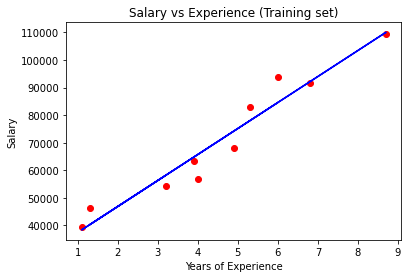

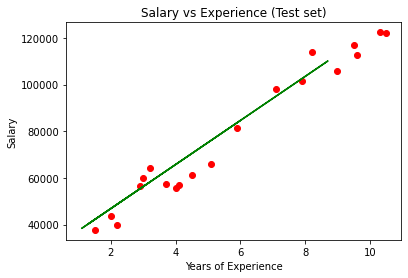

In [14]:
print()
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))

# Visualising the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='green')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
